In [26]:
#Step 1: Import Libraries
# =========================
import pandas as pd
import numpy as np
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# Step 2: Load Dataset
# =========================
data = pd.read_csv("/content/loan_approval_dataset.csv")  # change name if different

print(" Dataset Loaded Successfully")
print("Shape:", data.shape)
print("\nColumns:", data.columns.tolist())

 Dataset Loaded Successfully
Shape: (4269, 13)

Columns: ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [30]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [31]:
# Step 3: Clean Data
# =========================
# Remove leading/trailing spaces in column names
data.columns = data.columns.str.strip()

# Remove leading/trailing spaces in string values
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Check missing values
print("\nMissing values before filling:\n", data.isnull().sum())

# Fill missing values
data = data.fillna(method='ffill')


Missing values before filling:
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


/tmp/ipython-input-3763309237.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/tmp/ipython-input-3763309237.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [33]:
#  Step 4: Encode Categorical Columns
# =========================
cat_cols = ['education', 'self_employed', 'loan_status']
encoder = LabelEncoder()

for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

print("\n Categorical columns encoded successfully!")



 Categorical columns encoded successfully!


In [34]:
# Step 5: Split Features & Target
# =========================
X = data.drop(columns=['loan_id', 'loan_status'])
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTraining shape:", X_train.shape)
print("Testing shape:", X_test.shape)


Training shape: (3415, 11)
Testing shape: (854, 11)


In [35]:
#  Step 6: Handle Imbalance with SMOTE
# =========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("\nBefore SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_res))


Before SMOTE: Counter({0: 2125, 1: 1290})
After SMOTE: Counter({1: 2125, 0: 2125})


In [36]:
#  Step 7: Train Models
# =========================

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_res, y_train_res)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

In [38]:
#  Step 8: Evaluation
# =========================
def evaluate_model(model, X_test, y_test, name):
    print(f"\n===== {name} =====")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()




===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       531
           1       0.91      0.91      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



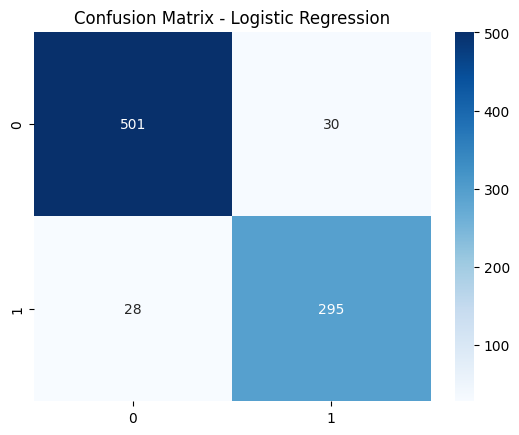


===== Decision Tree =====
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       531
           1       0.97      0.96      0.97       323

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854



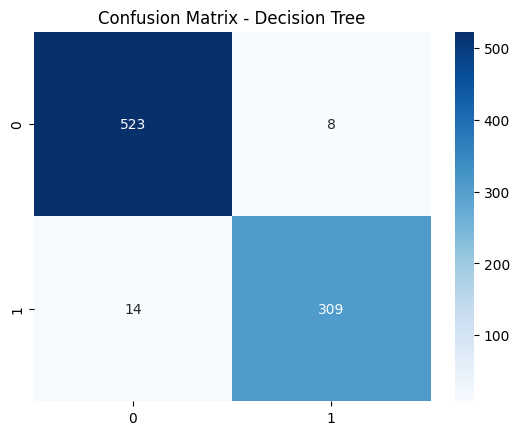

In [39]:

evaluate_model(log_model, X_test_scaled, y_test, "Logistic Regression")
evaluate_model(tree_model, X_test_scaled, y_test, "Decision Tree")

In [41]:
#  Step 9: Save Models
# =========================
import joblib

joblib.dump(log_model, "loan_logistic_model.pkl")
joblib.dump(tree_model, "loan_tree_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\n Models and scaler saved successfully!")
print("Files saved:")
print("loan_logistic_model.pkl")
print("loan_tree_model.pkl")
print("scaler.pkl")


 Models and scaler saved successfully!
Files saved:
loan_logistic_model.pkl
loan_tree_model.pkl
scaler.pkl


In [43]:
from sklearn.metrics import accuracy_score

# Predictions
y_pred_log = log_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

# Accuracy Scores
acc_log = accuracy_score(y_test, y_pred_log)
acc_tree = accuracy_score(y_test, y_pred_tree)

print("Logistic Regression Accuracy:", round(acc_log * 100, 2), "%")
print("Decision Tree Accuracy:", round(acc_tree * 100, 2), "%")



Logistic Regression Accuracy: 62.18 %
Decision Tree Accuracy: 62.18 %


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [45]:
# Classification Reports
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_tree))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77       531
           1       0.00      0.00      0.00       323

    accuracy                           0.62       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.39      0.62      0.48       854


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.62      1.00      0.77       531
           1       0.00      0.00      0.00       323

    accuracy                           0.62       854
   macro avg       0.31      0.50      0.38       854
weighted avg       0.39      0.62      0.48       854



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m